In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import janitor as jn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<strike>1. Check Columns Names (use janitor to fix it) </strike>

<strike>2. Check for Data Types</strike>


<strike>3. Check for data Imbalance</strike>

<strike>4. Check for Missing Values</strike>

<strike>5. Check for Bad Data (Age in negative)  </strike> None that I could think of at this point

<strike> 6. Check for distribution type </strike>

<strike> 7. Checks for outliers </strike>

<strike> 8. Categorical Variable treatments </strike>

9. Scaling the data

<strike> 10. Imputation of Null values </strike>

11. Perform necessary transformations
12. Perform feature Engineering
13. Binning Continuous data
14. Feature selection

In [2]:
raw_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
raw_data.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [48]:
for i in raw_data.columns:
    print(i)

Accident_ID
Police_Force
Number_of_Vehicles
Number_of_Casualties
Date
Day_of_Week
Time
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
1st_Road_Number
Road_Type
Speed_limit
2nd_Road_Class
2nd_Road_Number
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Light_Conditions
Weather_Conditions
Road_Surface_Conditions
Special_Conditions_at_Site
Carriageway_Hazards
Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident
state
postcode
country


In [49]:
len(raw_data)

478741

In [50]:
len(test_data)

121259

In [51]:
raw_data = jn.clean_names(raw_data)
test_data = jn.clean_names(test_data)

In [52]:
len(raw_data)

478741

In [53]:
raw_data.isnull().sum()

accident_id                                      0
police_force                                     0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                            14
local_authority_district_                        0
local_authority_highway_                         0
1st_road_class                                   0
1st_road_number                                  0
road_type                                        0
speed_limit                                      0
2nd_road_class                                   0
2nd_road_number                                  0
pedestrian_crossing_human_control                0
pedestrian_crossing_physical_facilities          0
light_conditions                                 0
weather_conditions                               0
road_surface_conditions        

In [54]:
raw_data.dropna(axis=1).isnull().sum()

accident_id                                    0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
local_authority_district_                      0
local_authority_highway_                       0
1st_road_class                                 0
1st_road_number                                0
road_type                                      0
speed_limit                                    0
2nd_road_class                                 0
2nd_road_number                                0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
carriageway_hazards                            0
urban_or_rural_area                            0
did_police_officer_a

In [55]:
for i in raw_data.columns:
    print(i)

accident_id
police_force
number_of_vehicles
number_of_casualties
date
day_of_week
time
local_authority_district_
local_authority_highway_
1st_road_class
1st_road_number
road_type
speed_limit
2nd_road_class
2nd_road_number
pedestrian_crossing_human_control
pedestrian_crossing_physical_facilities
light_conditions
weather_conditions
road_surface_conditions
special_conditions_at_site
carriageway_hazards
urban_or_rural_area
did_police_officer_attend_scene_of_accident
state
postcode
country


In [56]:
raw_data.head()

,accident_id,police_force,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district_,local_authority_highway_,1st_road_class,1st_road_number,road_type,speed_limit,2nd_road_class,2nd_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,395,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,13,One way street,30,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,8,Roundabout,40,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,24,Dual carriageway,30,6,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [57]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_id,478741.0,299892.954673,173261.274950,1.0,149718.0,299791.0,449990.0,599999.0
police_force,478741.0,31.610178,24.941660,1.0,12.0,33.0,45.0,98.0
number_of_vehicles,478741.0,1.745695,0.626458,1.0,1.0,2.0,2.0,4.0
number_of_casualties,478741.0,1.463528,0.816019,1.0,1.0,1.0,2.0,5.0
day_of_week,478741.0,4.367898,1.872983,1.0,3.0,5.0,6.0,7.0
local_authority_district_,478741.0,357.457132,256.530105,1.0,103.0,314.0,521.0,941.0
1st_road_class,478741.0,4.381542,1.369579,1.0,3.0,4.0,6.0,6.0
1st_road_number,478741.0,946.663375,1730.926876,0.0,10.0,336.0,569.0,9832.0
speed_limit,478741.0,37.035976,12.854299,20.0,30.0,30.0,40.0,70.0
2nd_road_class,478741.0,2.430068,3.268563,-1.0,-1.0,3.0,6.0,6.0


In [58]:
raw_data.head(1).T

,0
accident_id,1
police_force,34
number_of_vehicles,2
number_of_casualties,1
date,19/12/12
day_of_week,7
time,13:20
local_authority_district_,344
local_authority_highway_,E10000032
1st_road_class,4


## Hypothesis


1. Number of Vehicles incresases the # of casualties.
2. Day of week, week days due to busy days may lead to lot of accidents/casualities.
3. date and time are sepereate columns, the time can be intresting since most accident can happen between certain time.
4. speed limit can infulence the number of casualties.
5. road_type can have an effect (hair pin --> more accidents--> more casualities)
6. light_conditions dimlight may affect the driver and inturn lead to accident.
7. weather_conditions, rainy conditions can lead to accidents.
8. road_surface_conditions may lead to some mishaps
9. special_conditions_at_site (will need to look at the conditions before using it for decision making)
10. carriageway_hazards may have an infulence on the accident.
11. urban_or_rural_area, rural areas less traffic!
12. did_police_officer_attend_scene_of_accident could save life can be intersting to explore from data what the affects are 
13. postcode lets see if it helps
    
<br> </br>
<br>Need to explore the variables to make any hypothesis</br>

1.  1st_road_class, 1st_road_number, 2nd_road_number, 2nd_road_number not sure what these are and how to get a sense of them.
2.  Police Force not sure what this variable itself is at this point in project.
3.  urban_or_rural_area not sure what this is.
4.  local_authority_district_, local_authority_highway_ not sure what these are.
5.  pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities  not sure how to deal with this.
   
<br> </br>
<br>Not useful for analysis</br>

1.  state, accident_id, country seem to be unique.

In [59]:
raw_data.head(1).T

,0
accident_id,1
police_force,34
number_of_vehicles,2
number_of_casualties,1
date,19/12/12
day_of_week,7
time,13:20
local_authority_district_,344
local_authority_highway_,E10000032
1st_road_class,4


In [60]:
#sns.histplot(raw_data['police_force'])
#raw_data['number_of_vehicles'].value_counts()
#sns.histplot(raw_data['number_of_casualties'])
#raw_data['number_of_casualties'].value_counts()
#sns.histplot(raw_data['local_authority_district_'])
#sns.histplot(raw_data['local_authority_highway_'])
#raw_data['1st_road_class'].value_counts()
#sns.histplot(['1st_road_number'])
#raw_data['road_type'].value_counts()
#raw_data['speed_limit'].value_counts()
#raw_data['2nd_road_class'].value_counts()
#raw_data['2nd_road_number'].value_counts()
#raw_data['pedestrian_crossing_physical_facilities'].value_counts()
#raw_data['country'].value_counts()

In [61]:
## Data Types

cat_col = ['number_of_vehicles', 'day_of_week', '1st_road_class', 'road_type', 'speed_limit', '2nd_road_class', 
            'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions',
            'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site',
            'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
            'state', 'local_authority_highway_' ,'postcode']

num_col = ['police_force', 'local_authority_district_',]

dat_col = ['date', 'day_of_week', 'time']

drp_col = ['1st_road_number', '2nd_road_number', 'country', 'accident_id']

## Data Dictionary:

Numeric
1. police_force
2. local_authority_district_


Categorical
1. number_of_vehicles: this is categorical, with 4 categories (1-4)
2. day_of_week
3. 1st_road_class: 8 classes
4. road_type: 6 types and 1 is unkown
5. speed_limit: 6 classes (20-70)
6. 2nd_road_class: 5 classes
7. pedestrian_crossing_human_control: 3 classes/types
8. pedestrian_crossing_physical_facilities: 6 classes
9. light_conditions: 5 classes
10. weather_conditions: 9 classes and 1 is unknown
11. road_surface_conditions: 5 classes
12. special_conditions_at_site: 8 classes
13. carriageway_hazards: 6 classes, most of them are NONE
14. urban_or_rural_area (1 or 2)
15. did_police_officer_attend_scene_of_accident: Yes or No values
16. state: 3 types
17. postcode: A lot of postcode
18. local_authority_highway_

Date
1. date
2. day_of_week (also categorical)
3. time

Drop Columns

1. 1st_road_number
2. 2nd_road_number
3. accident_id
4. country

Target column:
number_of_casualties: it is categorical (1-5) or numeric 

## I. Numeric Values

### 1. Police Force

<AxesSubplot:xlabel='police_force', ylabel='Count'>

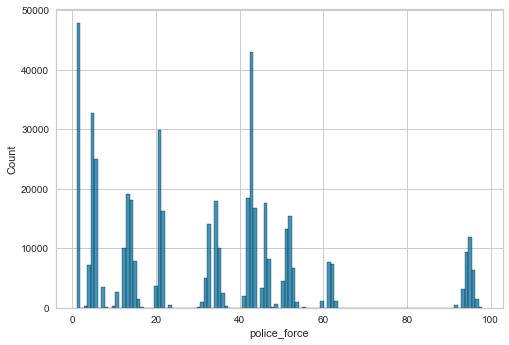

In [62]:
sns.histplot(raw_data['police_force'])

In [63]:
raw_data['police_force'].describe()

count    478741.000000
mean         31.610178
std          24.941660
min           1.000000
25%          12.000000
50%          33.000000
75%          45.000000
max          98.000000
Name: police_force, dtype: float64

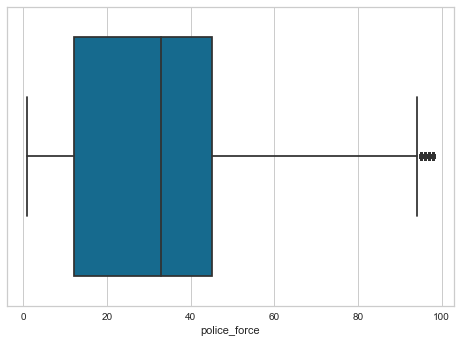

In [64]:
sns.boxplot(raw_data['police_force'])
plt.show()

### 2. local_authority_district_

<AxesSubplot:xlabel='local_authority_district_', ylabel='Count'>

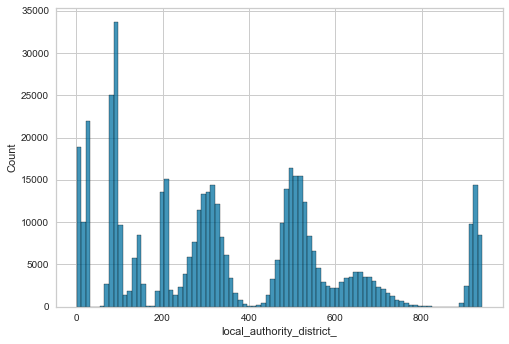

In [65]:
sns.histplot(raw_data['local_authority_district_'])

In [66]:
raw_data['local_authority_district_'].describe()

count    478741.000000
mean        357.457132
std         256.530105
min           1.000000
25%         103.000000
50%         314.000000
75%         521.000000
max         941.000000
Name: local_authority_district_, dtype: float64

<AxesSubplot:xlabel='local_authority_district_'>

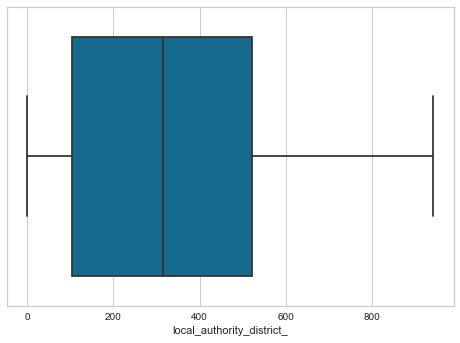

In [67]:
sns.boxplot(raw_data['local_authority_district_'])

## II. Categorical Variables

number_of_vehicles is the Categorical Variable we are looking at now is
2    281598
1    163061
3     26849
4      7233
Name: number_of_vehicles, dtype: int64


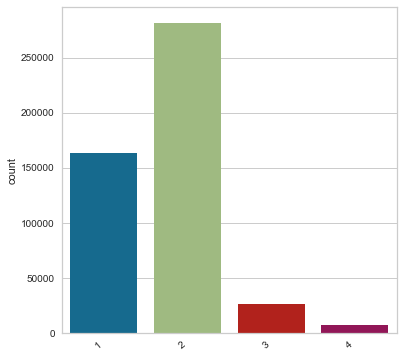

day_of_week is the Categorical Variable we are looking at now is
6    101004
3     96595
5     72808
7     71126
2     57859
4     46098
1     33251
Name: day_of_week, dtype: int64


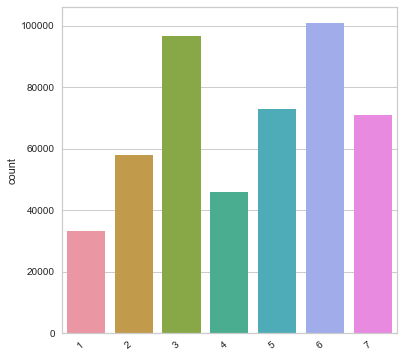

1st_road_class is the Categorical Variable we are looking at now is
3    168644
6    158212
4     73233
5     67709
1     10943
Name: 1st_road_class, dtype: int64


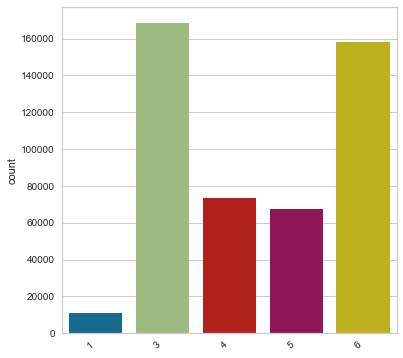

road_type is the Categorical Variable we are looking at now is
Single carriageway    372554
Dual carriageway       52783
Roundabout             28541
One way street         24311
Slip road                523
Unknown                   29
Name: road_type, dtype: int64


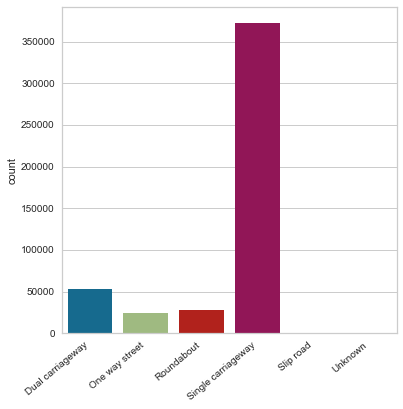

speed_limit is the Categorical Variable we are looking at now is
30    329800
60     75015
40     34108
70     16147
50     12257
20     11414
Name: speed_limit, dtype: int64


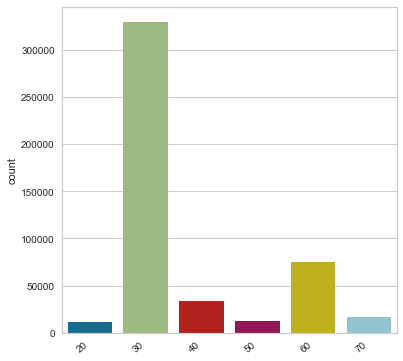

2nd_road_class is the Categorical Variable we are looking at now is
-1    220221
 6    181479
 3     38286
 5     24842
 4     13913
Name: 2nd_road_class, dtype: int64


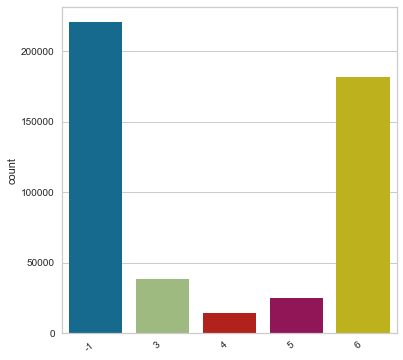

pedestrian_crossing_human_control is the Categorical Variable we are looking at now is
None within 50 metres                 455040
Control by other authorised person     23669
Control by school crossing patrol         32
Name: pedestrian_crossing_human_control, dtype: int64


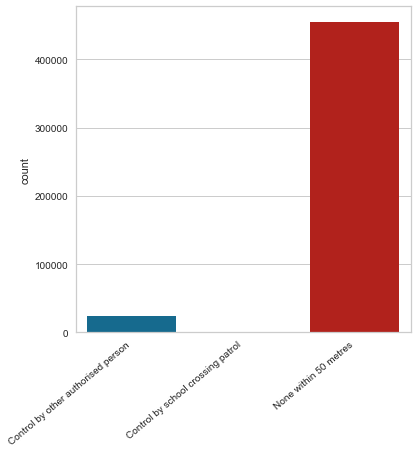

pedestrian_crossing_physical_facilities is the Categorical Variable we are looking at now is
No physical crossing within 50 meters          404561
Pedestrian phase at traffic signal junction     35618
Zebra crossing                                  27007
non-junction pedestrian crossing                 9659
Central refuge                                   1834
Footbridge or subway                               62
Name: pedestrian_crossing_physical_facilities, dtype: int64


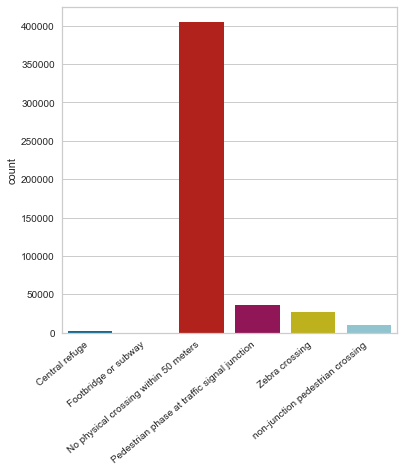

light_conditions is the Categorical Variable we are looking at now is
Daylight: Street light present               377728
Darkness: Street lights present and lit       70860
Darkness: Street lighting unknown             16817
Darkeness: No street lighting                 13152
Darkness: Street lights present but unlit       184
Name: light_conditions, dtype: int64


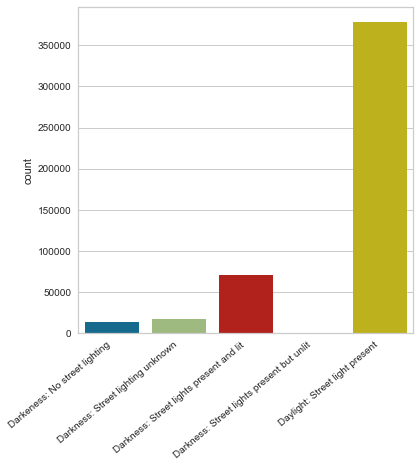

weather_conditions is the Categorical Variable we are looking at now is
Fine without high winds       379429
Raining without high winds     53708
Raining with high winds        20326
Fine with high winds           14714
Snowing without high winds      4608
Other                           4531
Fog or mist                     1058
Snowing with high winds          249
Unknown                          118
Name: weather_conditions, dtype: int64


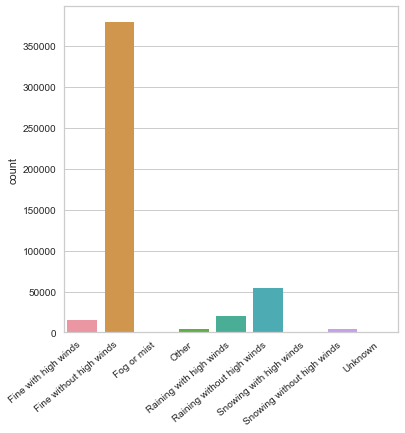

road_surface_conditions is the Categorical Variable we are looking at now is
Dry                          365843
Wet/Damp                      87570
Frost/Ice                     16172
Snow                           8613
Flood (Over 3cm of water)        91
Name: road_surface_conditions, dtype: int64


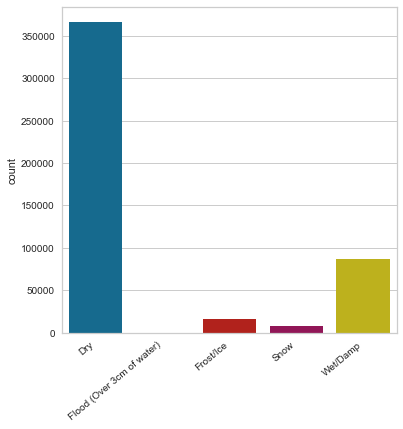

special_conditions_at_site is the Categorical Variable we are looking at now is
None                                               427839
Roadworks                                           45252
Ol or diesel                                         1371
Road surface defective                               1289
Mud                                                  1104
Auto traffic singal out                               885
Permanent sign or marking defective or obscured       660
Auto traffic signal partly defective                  278
Name: special_conditions_at_site, dtype: int64


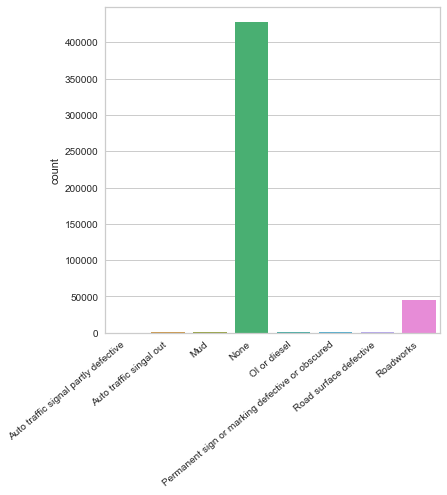

carriageway_hazards is the Categorical Variable we are looking at now is
None                                       459559
Other object in carriageway                 17355
Any animal (except a ridden horse)           1401
Pedestrian in carriageway (not injured)       313
Involvement with previous accident             76
Dislodged vehicle load in carriageway          37
Name: carriageway_hazards, dtype: int64


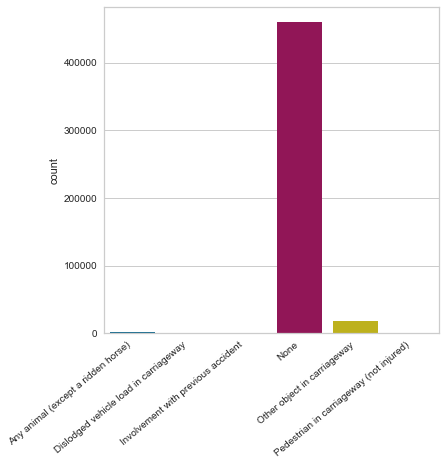

urban_or_rural_area is the Categorical Variable we are looking at now is
1    286263
2    192478
Name: urban_or_rural_area, dtype: int64


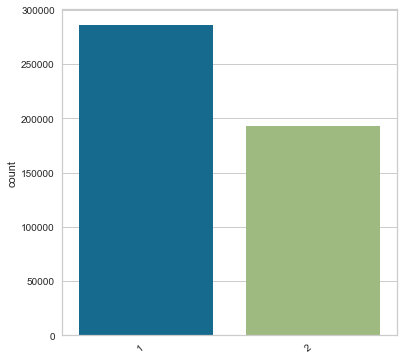

did_police_officer_attend_scene_of_accident is the Categorical Variable we are looking at now is
Yes    391064
No      87677
Name: did_police_officer_attend_scene_of_accident, dtype: int64


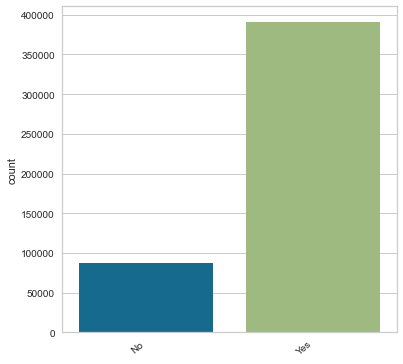

state is the Categorical Variable we are looking at now is
England            407853
Alba / Scotland     59667
Cymru / Wales       11221
Name: state, dtype: int64


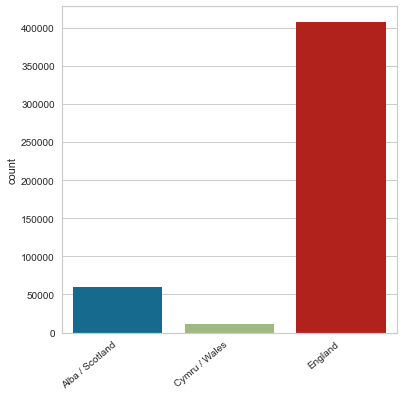

local_authority_highway_ is the Categorical Variable we are looking at now is
E10000016    31297
E10000029    19499
E08000032    18150
E10000032    16902
E10000007    12928
E08000035    11790
E10000008    11485
E10000015     9866
E10000017     8309
E10000030     7947
E10000023     7781
E06000047     7701
E10000031     6331
E10000024     6286
E08000025     6162
E06000050     5663
E09000033     5348
E10000006     4943
E10000018     4377
E10000027     4097
E08000017     4078
E06000011     3917
E06000049     3805
E08000019     3768
S12000036     3613
E08000012     3359
E10000011     3346
E08000036     3206
S12000038     3165
E06000055     3156
W06000023     3091
E08000033     3090
S12000040     3062
W06000016     3054
E08000030     3032
E08000014     2965
E06000029     2957
E06000022     2914
W06000005     2854
E09000025     2850
E06000051     2820
E10000020     2785
E06000033     2758
E09000016     2727
E06000005     2684
E09000005     2675
E06000014     2651
E09000023     2613
E08000015 

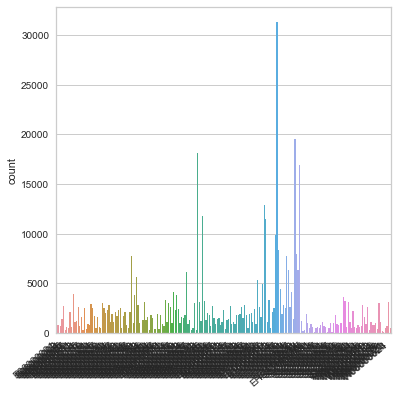

Skipping.........Postcode too many categories


In [68]:
for cat in cat_col:
    if cat == 'postcode':
        print('Skipping.........Postcode too many categories')
    else:
        print(cat, "is the Categorical Variable we are looking at now is")
        print(raw_data[cat].value_counts())
        
        plt.figure(figsize=(6, 6))
        
        ax = ((sns.countplot(pd.Categorical(raw_data[cat]))))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.show()
        print('==='*50)

## Insights about the Categorical Data

1. number_of_vechiles: Data mostly is about when there were 2/1 vechiles invovled. This can be used for modelling.
2. day_of_week: Surprisingly the most data is recorded about 6 (saturday) followed by 3, 5, 7, 
3. 1st_road_class: most belong to 3 and 6
4. road_type: Most belong to Single carriageway, followed by Dual carriageway (last 2 can be grouped together)
5. speed_limit: Most data says 30(329800) mph has the speed limit
6. 2nd_road_class: Most data is about the category -1 and 6
7. pedestrian_crossing_human_control: Most value (None within 50 metres ), Control by other authorised person (second most), 3rd very less
8. pedestrian_crossing_physical_facilities: No physical crossing within 50 meters          404561
											Pedestrian phase at traffic signal junction     35618
											Zebra crossing                                  27007

9. light_conditions: Most days (Daylight), next Darkness: Street lights present and lit 
10. weather_conditions: Most days Fine without high winds, next highest (Raining without high winds     53708)
11. road_surface_conditions: Most roads are Dry, Wet/Damp (next highest)
12. special_conditions_at_site: Most of them have the value None and few not none (Check if not none how it affected the causalities)
13. carriageway_hazards: Most of them are None (Check if not none how it affected the causalities)
14. urban_or_rural_area: Nearly equal (1 is slighly higher)
15. did_police_officer_attend_scene_of_accident: Most of them are Yes
16. state: Most of them are in England

## III. Time Data Manipulation

In [69]:
raw_data['time'].apply(lambda x: str(x).split(":")[0])
raw_data['Date_time'] =  raw_data['date'] +' '+ raw_data['time']
raw_data['Date_time'] = pd.to_datetime(raw_data.Date_time)

## IV. Visuals 

### 1. Accidents on the day of a week

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

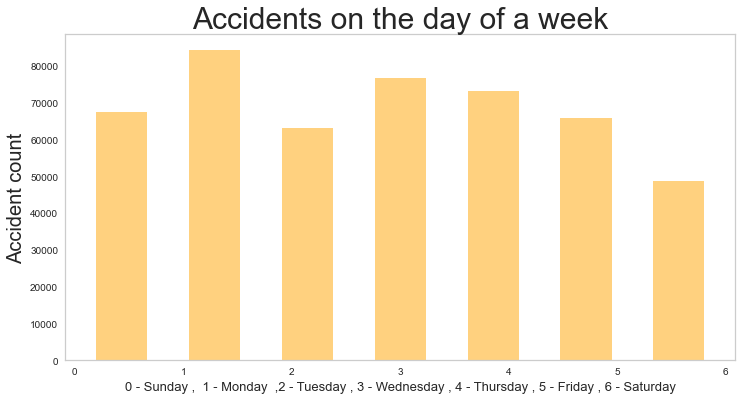

In [70]:
plt.figure(figsize=(12,6))
raw_data.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

### 2. Time of the day/night when accident takes place

Text(0, 0.5, 'Accident count')

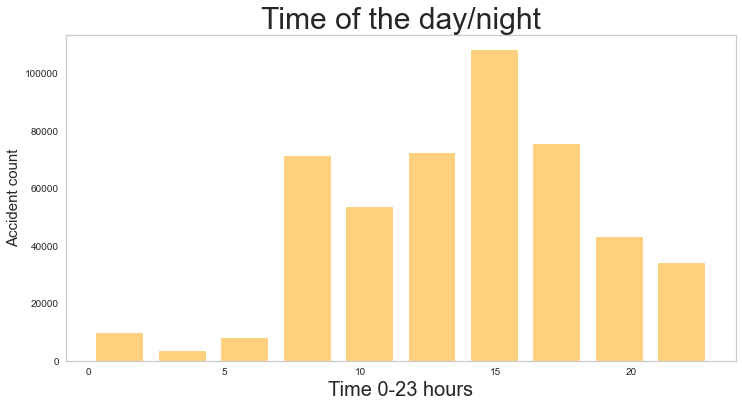

In [71]:
plt.figure(figsize=(12,6))
raw_data.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

### 3. Average Number of Casualties based on Speed Limit

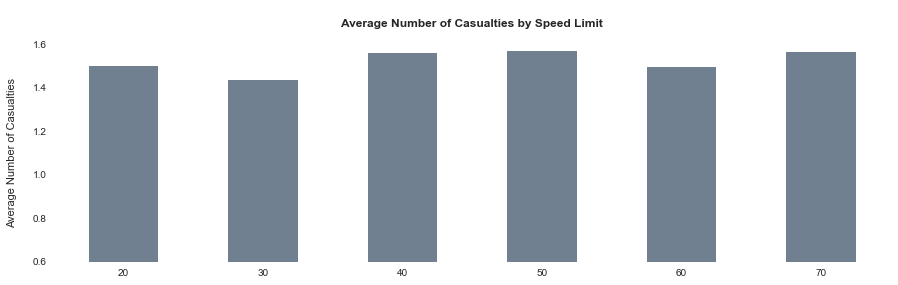

In [72]:
# check speed limit
raw_data.groupby('speed_limit')['number_of_casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(6), 
           [i for i in range(20, 80, 10)], 
           rotation='horizontal')
plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

### 4. Average Number of Casualties by the number of vechiles involved

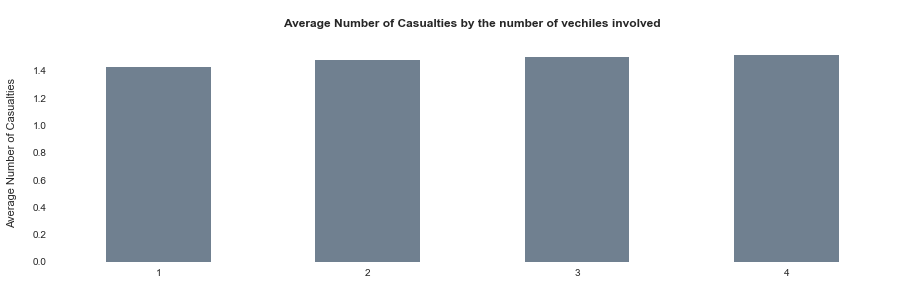

In [73]:
#raw_data.groupby('number_of_vehicles')['number_of_casualties'].mean()
raw_data.groupby('number_of_vehicles')['number_of_casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(4), 
           [i for i in range(1, 5,)], 
           rotation='horizontal')
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by the number of vechiles involved\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

### 5. Average Number of Casualties based on road type

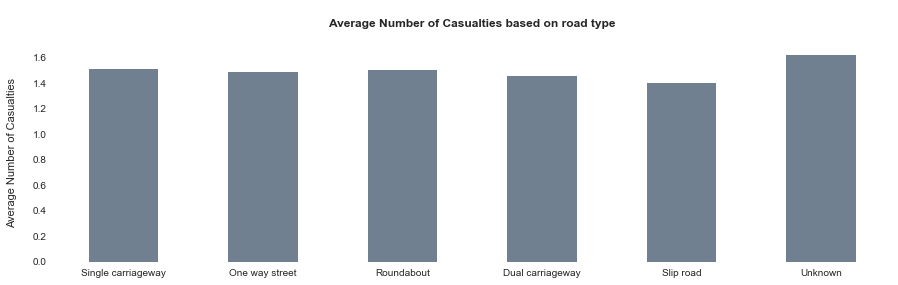

In [74]:
#raw_data.groupby('number_of_vehicles')['number_of_casualties'].mean()
raw_data.groupby('road_type')['number_of_casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(6), 
           list(raw_data['road_type'].unique()), 
           rotation='horizontal')
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties based on road type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

### 6. Number of Casualties based on road_type

road_type
Dual carriageway       52783
One way street         24311
Roundabout             28541
Single carriageway    372554
Slip road                523
Unknown                   29
Name: number_of_casualties, dtype: int64


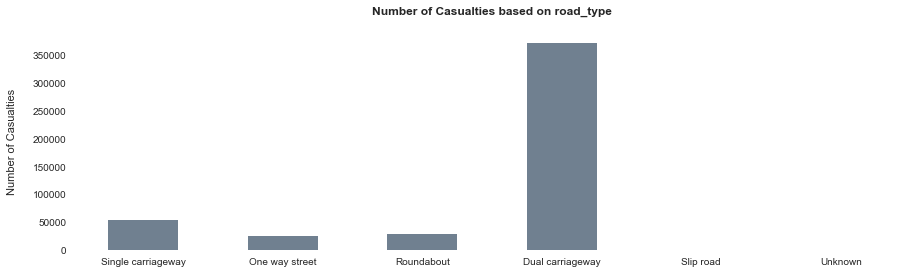

In [75]:
print(raw_data.groupby('road_type')['number_of_casualties'].count())
raw_data.groupby('road_type')['number_of_casualties'].count().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(6), 
           list(raw_data['road_type'].unique()), 
           rotation='horizontal')
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Number of Casualties\n')
plt.title('Number of Casualties based on road_type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

light_conditions
Darkeness: No street lighting                1.506007
Darkness: Street lighting unknown            1.479693
Darkness: Street lights present and lit      1.429424
Darkness: Street lights present but unlit    1.451087
Daylight: Street light present               1.467733
Name: number_of_casualties, dtype: float64


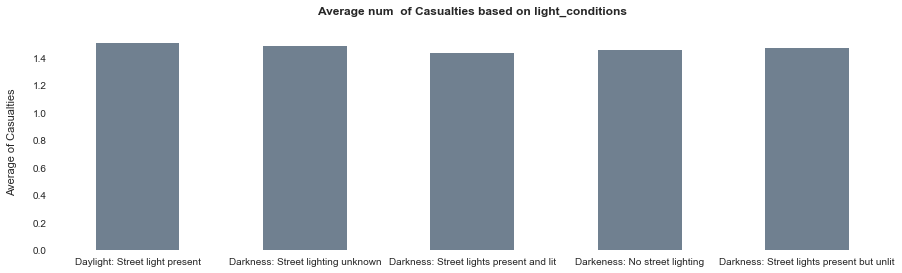

In [76]:
col = 'light_conditions'
print(raw_data.groupby(col)['number_of_casualties'].mean())
raw_data.groupby(col)['number_of_casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(5), 
           list(raw_data[col].unique()), 
           rotation='horizontal')
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average of Casualties\n')
plt.title(f'Average num  of Casualties based on {col}\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

light_conditions
Darkeness: No street lighting                 13152
Darkness: Street lighting unknown             16817
Darkness: Street lights present and lit       70860
Darkness: Street lights present but unlit       184
Daylight: Street light present               377728
Name: number_of_casualties, dtype: int64


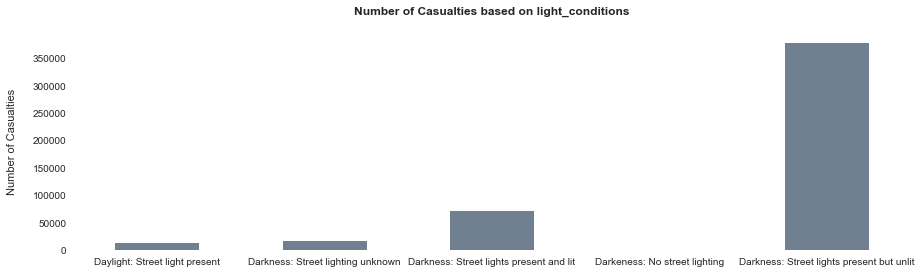

In [77]:
col = 'light_conditions'
print(raw_data.groupby(col)['number_of_casualties'].count())
raw_data.groupby(col)['number_of_casualties'].count().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(5), 
           list(raw_data[col].unique()), 
           rotation='horizontal')
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Number of Casualties\n')
plt.title(f'Number of Casualties based on {col}\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

weather_conditions
Fine with high winds           14714
Fine without high winds       379429
Fog or mist                     1058
Other                           4531
Raining with high winds        20326
Raining without high winds     53708
Snowing with high winds          249
Snowing without high winds      4608
Unknown                          118
Name: number_of_casualties, dtype: int64


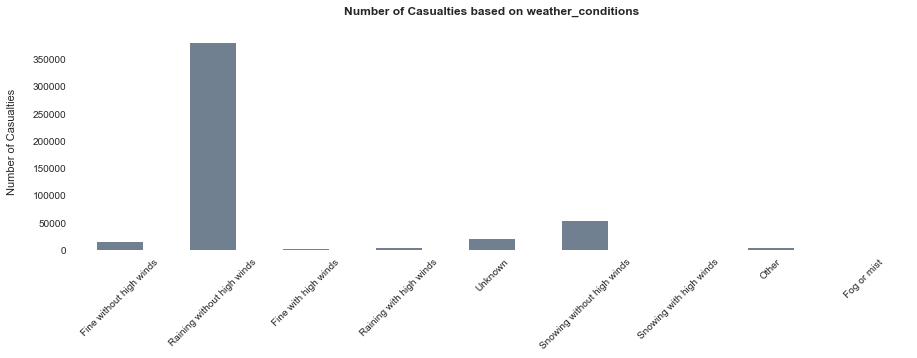

In [78]:
col = 'weather_conditions'
print(raw_data.groupby(col)['number_of_casualties'].count())
raw_data.groupby(col)['number_of_casualties'].count().plot(kind='bar', color='slategrey', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(9), 
           list(raw_data[col].unique()), 
            rotation = 45)
#plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Number of Casualties\n')
plt.title(f'Number of Casualties based on {col}\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

## V. Missing Values

In [79]:
raw_data.isnull().sum()

accident_id                                      0
police_force                                     0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                            14
local_authority_district_                        0
local_authority_highway_                         0
1st_road_class                                   0
1st_road_number                                  0
road_type                                        0
speed_limit                                      0
2nd_road_class                                   0
2nd_road_number                                  0
pedestrian_crossing_human_control                0
pedestrian_crossing_physical_facilities          0
light_conditions                                 0
weather_conditions                               0
road_surface_conditions        

We see that all the columns are categorical, so we will replace the missing values with the most repeated value

In [80]:
cols_missing_values = ['time', 'road_surface_conditions', 'special_conditions_at_site']

In [81]:
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col

In [82]:
for col in cols_missing_values:
    raw_data=raw_data.apply(lambda col:fillna(col))

In [83]:
raw_data.isnull().sum()

accident_id                                    0
police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district_                      0
local_authority_highway_                       0
1st_road_class                                 0
1st_road_number                                0
road_type                                      0
speed_limit                                    0
2nd_road_class                                 0
2nd_road_number                                0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_a

## VI. Creating the target column and elimnate unwanted columns

In [84]:
# we need to calculate Accident_Risk_Index as sum(Number_of_casualities)/count(Accident_ID)
grouped_train = raw_data.groupby('postcode') # group by postcode
#create aggregation functions
aggregations = {'number_of_casualties': [np.mean],
               'accident_id': [np.count_nonzero]}
aggregated_ = grouped_train.agg(aggregations)
# formula mentioned above is used to calculate <Accident_Risk_Index>
aggregated_['accident_risk_index'] = aggregated_['number_of_casualties']['mean']/aggregated_['accident_id']['count_nonzero']

In [85]:
grouped_train['number_of_casualties'].count().sort_values(ascending=False)[:10].to_frame()

,number_of_casualties
postcode,
B32 1AG,29
OX20 1TE,29
SM7 3AS,27
LE6 0GF,27
AB11 6JS,26
MK10 9AP,26
WR5 3TL,26
TQ10 9ER,26
ST11 9FF,25


In [86]:
raw_data['number_of_casualties']

0         1
1         1
2         1
3         1
4         1
         ..
478736    1
478737    1
478738    4
478739    1
478740    1
Name: number_of_casualties, Length: 478741, dtype: int64

In [87]:
train = pd.merge(raw_data,aggregated_['accident_risk_index'],'right','postcode')

In [88]:
drp_col

['1st_road_number', '2nd_road_number', 'country', 'accident_id']

In [89]:
train.drop(drp_col, inplace=True, axis=1)

In [90]:
train.head(1).T

,0
police_force,46
number_of_vehicles,2
number_of_casualties,2
date,12/03/12
day_of_week,6
time,19:00
local_authority_district_,474
local_authority_highway_,E06000021
1st_road_class,6
road_type,Roundabout


## V. Feature Engg

The following inspired from https://www.kaggle.com/code/brittabettendorf/predicting-number-of-casualties/notebook 

Next, let's define a new column that groups the Time the accidents happened into one of five options:

Morning Rush from 5am to 10am --> value 1
Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [91]:
raw_data.head(1).T

,0
accident_id,1
police_force,34
number_of_vehicles,2
number_of_casualties,1
date,19/12/12
day_of_week,7
time,13:20
local_authority_district_,344
local_authority_highway_,E10000032
1st_road_class,4


In [92]:
def time_labeler(col):
    '''
    This function 
    '''
    print(col)
    hour = col.split(':')[0]
    
    hour = int(hour)
    print(hour)
    if 0<hour<6:
        print(1)
        return 1
    elif 7<hour<12:
        print(2)
        return 2
    elif 13<hour<18:
        print(3)
        return 3
    elif 19<hour<18:
        print(4)
        return 4

In [93]:
def when_was_it(col):
    '''
    This function creates the mapping mentioned in the Descriptive analysis
    '''
    hour = col.split(':')[0]
    hour = int(hour)
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [94]:
raw_data['time_cat'] = raw_data['time'].apply(when_was_it)
# time_cat column is the categorical variable which tells the part of the day we did the binning here

In [95]:
raw_data.head(1).T

,0
accident_id,1
police_force,34
number_of_vehicles,2
number_of_casualties,1
date,19/12/12
day_of_week,7
time,13:20
local_authority_district_,344
local_authority_highway_,E10000032
1st_road_class,4


## Delete some more columns

In [96]:
raw_data.drop(['local_authority_highway_', 'date', 'Date_time', 'time', 'accident_id',], inplace=True, axis=1)


In [97]:
raw_data.columns

Index(['police_force', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'local_authority_district_', '1st_road_class',
       '1st_road_number', 'road_type', 'speed_limit', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'state', 'postcode', 'country', 'time_cat'],
      dtype='object')

In [98]:
num_col

['police_force', 'local_authority_district_']

In [99]:
cat_cols2 = ['number_of_vehicles',
       'day_of_week',  '1st_road_class',
       '1st_road_number', 'road_type', 'speed_limit', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'state', 'postcode', 'country', 'time_cat']

In [100]:
len(cat_cols2 + num_col)

23

In [101]:
le = LabelEncoder()

In [102]:
data_train = raw_data.copy()

In [103]:
nvech = []
for column in cat_cols2:
    #print(column)
    data_train[column] = le.fit_transform(data_train[column])

In [104]:
data_train.dtypes

police_force                                   int64
number_of_vehicles                             int64
number_of_casualties                           int64
day_of_week                                    int64
local_authority_district_                      int64
1st_road_class                                 int64
1st_road_number                                int64
road_type                                      int64
speed_limit                                    int64
2nd_road_class                                 int64
2nd_road_number                                int64
pedestrian_crossing_human_control              int64
pedestrian_crossing_physical_facilities        int64
light_conditions                               int64
weather_conditions                             int64
road_surface_conditions                        int64
special_conditions_at_site                     int64
carriageway_hazards                            int64
urban_or_rural_area                           

In [105]:
data_train.isnull().sum()

police_force                                   0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
local_authority_district_                      0
1st_road_class                                 0
1st_road_number                                0
road_type                                      0
speed_limit                                    0
2nd_road_class                                 0
2nd_road_number                                0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
carriageway_hazards                            0
urban_or_rural_area                            0
did_police_officer_attend_scene_of_accident    0
state               

In [106]:
train_new = train.drop(['accident_risk_index', 'Date_time', 'date'], axis=1)

In [107]:
data_train['number_of_casualties'] = train['number_of_casualties']

In [108]:
from pycaret.regression import *

In [110]:
expirement = setup(data = data_train,  target = 'number_of_casualties', silent=True,train_size=0.8)


,Description,Value
0,session_id,5517
1,Target,number_of_casualties
2,Original Data,"(478741, 24)"
3,Missing Values,0
4,Numeric Features,4
5,Categorical Features,19
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(382992, 90)"


In [111]:
best_model = compare_models(include=['lr',])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.6378,0.6673,0.8169,-0.0003,0.2742,0.4335,0.8080


In [113]:
lr_is_best_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6401,0.6724,0.8200,-0.0006,0.2750,0.4329
1,0.6386,0.6749,0.8215,-0.0003,0.2748,0.4336
2,0.6388,0.6698,0.8184,-0.0003,0.2745,0.4329
3,0.6344,0.6545,0.8090,-0.0001,0.2728,0.4340
4,0.6352,0.6561,0.8100,-0.0000,0.2730,0.4333
5,0.6360,0.6617,0.8134,-0.0002,0.2735,0.4338
6,0.6387,0.6708,0.8190,-0.0004,0.2747,0.4341
7,0.6390,0.6747,0.8214,-0.0002,0.2749,0.4330
8,0.6391,0.6682,0.8174,-0.0003,0.2746,0.4335


In [155]:
lr_is_best_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [158]:
evaluate_model(lr_is_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

In [114]:
pred_holdout = predict_model(lr_is_best_model) # Run on the hold out test set

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.6360,0.6611,0.8131,-0.0003,0.2735,0.4332


In [117]:
predicted_values = pred_holdout['Label']

In [121]:
predicted_values[:10]

0    1.463464
1    1.462211
2    1.483798
3    1.451520
4    1.465388
5    1.436032
6    1.469968
7    1.466375
8    1.445352
9    1.471416
Name: Label, dtype: float32

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data_train.drop(['number_of_casualties'], axis=1), train['accident_risk_index'], )

In [59]:
RF = RandomForestRegressor()

In [60]:
AB = AdaBoostRegressor()
AB.fit(x_train, y_train)

AdaBoostRegressor()

In [61]:
#RF.fit(x_train, y_train)

In [62]:
RF.score(x_test, y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
LR.score(x_test, y_test)

-5.7055427601149233e-05

In [ ]:
test_data.isnull().sum()

accident_id                                     0
police_force                                    0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            1
local_authority_district_                       0
local_authority_highway_                        0
1st_road_class                                  0
1st_road_number                                 0
road_type                                       0
speed_limit                                     0
2nd_road_class                                  0
2nd_road_number                                 0
pedestrian_crossing_human_control               0
pedestrian_crossing_physical_facilities         0
light_conditions                                0
weather_conditions                              0
road_surface_conditions                        39


In [ ]:
for col in cols_missing_values:
    test_data=test_data.apply(lambda col:fillna(col))

In [ ]:
test_data['time_cat'] = test_data['time'].apply(when_was_it)

In [ ]:
test_data[cat_cols2]

,number_of_vehicles,day_of_week,1st_road_class,1st_road_number,road_type,speed_limit,2nd_road_class,2nd_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,state,postcode,country,time_cat
0,2,6,4,6358,Single carriageway,60,6,0,None within 50 metres,No physical crossing within 50 meters,...,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom,2
1,2,7,6,29,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom,1
2,2,3,3,5376,Roundabout,40,3,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom,4
3,2,4,4,1252,Single carriageway,30,-1,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom,1
4,2,1,4,1202,Single carriageway,30,3,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121254,2,5,6,0,Single carriageway,30,3,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Wet/Damp,None,None,1,Yes,England,HD9 4AB,United Kingdom,3
121255,2,6,3,379,Dual carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,...,Raining without high winds,Wet/Damp,None,None,1,Yes,Alba / Scotland,AL2 1FS,United Kingdom,1
121256,2,6,3,19,Dual carriageway,40,5,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Dry,Roadworks,None,2,Yes,England,BN3 3WA,United Kingdom,1
121257,2,5,6,13,Single carriageway,30,6,0,None within 50 metres,No physical crossing within 50 meters,...,Fine without high winds,Wet/Damp,Roadworks,None,1,Yes,England,DL14 8HH,United Kingdom,4


In [ ]:
for column in cat_cols2:
    #print(column)
    test_data[column] = le.fit_transform(test_data[column])

In [ ]:
RF.predict(test_data[cat_cols2 + num_col])

array([0.93634529, 0.864208  , 0.8140066 , ..., 0.93967926, 0.67040799,
       0.6684165 ])

In [ ]:
sub = pd.read_csv('/Users/virajdatt/Desktop/github/public/Machine-Hack-/Predict-accident-risk-score-for-unique-postcode/data/sample_submission.csv')

In [ ]:
test_data['Accident_risk_index'] = RF.predict(test_data[cat_cols2 + num_col])

In [ ]:
test_data[['postcode', 'Accident_risk_index', ]].to_csv('sub1.csv', index=False)

In [ ]:
len(raw_data)

478741

In [ ]:
len(sub)

49772

In [ ]:
len(test_data)

121259

In [ ]:
test_data['Accident_risk_index'] = AB.predict(test_data[cat_cols2 + num_col]) 
grouped_test = test_data.groupby('postcode')
agger = {'Accident_risk_index':np.mean}
averaged = grouped_test['Accident_risk_index'].apply(np.mean)
new_df = averaged.reset_index()
sub['Accident_risk_index'] = new_df['Accident_risk_index']
sub.to_csv('sub3.csv', index=False)

<AxesSubplot:>

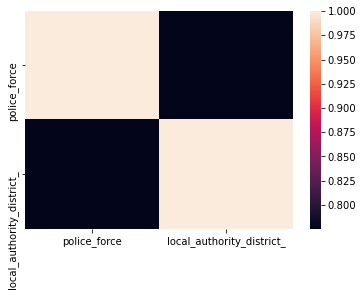

In [ ]:
sns.heatmap(raw_data[['police_force', 'local_authority_district_']].corr())

In [ ]:
raw_data[['police_force', 'local_authority_district_']].corr()

,police_force,local_authority_district_
police_force,1.000000,0.775673
local_authority_district_,0.775673,1.000000
